In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("/home/maxime/genomewide_streme_mM_gap3_minpeak3/repeats.fasta", "r") as f:
    l = np.array(f.readlines()[::2])


l = np.array(np.char.split(l, "_"))
l = np.stack(l, axis = 0)

import pandas as pd

df = pd.DataFrame(l, columns=["chr", "pos", "score"])
df["chr"] = df["chr"].str.lstrip(">")
df["score"] = df["score"].str.rstrip("\n")

df = df.astype({'pos':'int64'})

df



,chr,pos,score
0,chr1,53659329,11.1899995803833
1,chr1,175556293,-0.25
2,chr1,151242438,35.65999984741211
3,chr1,83412689,21.290000915527344
4,chr1,161269459,11.65999984741211
...,...,...,...
60110,chr19,54986389,5.949999809265137
60111,chr19,38422166,24.489999771118164
60112,chr19,53290647,0.07000000029802322
60113,chr19,13821603,8.359999656677246


In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open("/home/maxime/genomewide_streme_mM_gap3_minpeak3/repeats.fasta", "r") as f:
    l = np.array(f.readlines()[::2])


l = np.array(np.char.split(l, "_"))
l = np.stack(l, axis = 0)

import pandas as pd

df = pd.DataFrame(l, columns=["chr", "pos", "score"])
df["chr"] = df["chr"].str.lstrip(">")
df["score"] = df["score"].str.rstrip("\n")
pos, chrom = np.array(df.pos, dtype= int), np.array(df.chr.str.lstrip("chr"), dtype=int)
pos+=chrom*int(1e10)
df = df.astype({'pos':'int64'})


rm = pd.read_csv("/home/maxime/data/sequences/mm10/repeat_masker", sep="\t")
#print(np.sum((rm.genoStart == 0) & (rm.genoName=="chr1")))
rm.genoName = [int(x) if x.isnumeric() else 0 for x in [x[0].lstrip("chr") for x in np.array(rm.genoName.str.split("_"))] ]
rm = rm[rm.genoName!=0]
rm = rm.astype({'genoStart':'int64', 'genoEnd':'int64'})
rm.genoStart = rm.genoStart + rm.genoName*int(1e10)
rm.genoEnd = rm.genoEnd + rm.genoName*int(1e10)
rm = rm.sort_values(by=['genoStart'])

rm.head()


0


,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
5148877,585,605,200,6,1,1,10000000000,10000000123,-325904,-,Lx11,LINE,L1,-436,1488,1388,8
5149504,585,1045,91,14,0,1,10000000000,10000000143,-456655,+,L1_Mur1,LINE,L1,5318,5462,-1364,1
5139358,585,498,195,12,0,1,10000000000,10000000082,-281173,-,B1_Mur4,SINE,Alu,-54,96,14,6
5151394,585,2376,21,3,168,1,10000000000,10000000410,-686532,-,RLTR10,LTR,ERVK,-48,342,1,1
5142931,585,399,217,53,36,1,10000000002,10000000112,-3760845,-,MLTR18C_MM,LTR,ERVK,-586,114,3,8


In [7]:
pos = np.sort(pos)

In [8]:
def find_closest_start(pos, df):
    start_idx = np.searchsorted(df['genoStart'].values, pos, side='right') - 1
    if start_idx < 0:
        return None
    return start_idx

In [37]:
matches = []
start_idx = 0
for i, p in enumerate(pos):
    start_idx = find_closest_start(p,rm.iloc[start_idx:])
    if start_idx is None:
        continue
    end_idx = start_idx + np.searchsorted(rm.iloc[start_idx:]['genoEnd'].values, p, side='right')
    if end_idx >= len(df):
        continue
    matches.append(rm.iloc[start_idx:end_idx+1])
    print(p)
    print(matches)
    break
matches = pd.concat(matches)
matches

10003018645
[         #bin  swScore  milliDiv  milliDel  milliIns  genoName    genoStart  \
5147680   608       13       169         0        57         1  10003017623   
5147681   608      333       349        26        50         1  10003020293   

             genoEnd  genoLeft strand repName       repClass      repFamily  \
5147680  10003017660   -743297      +  (AAT)n  Simple_repeat  Simple_repeat   
5147681  10003020453   -740504      +      B3           SINE             B2   

         repStart  repEnd  repLeft  id  
5147680         1      35        0   8  
5147681        20     175      -41   8  ]


,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
5147680,608,13,169,0,57,1,10003017623,10003017660,-743297,+,(AAT)n,Simple_repeat,Simple_repeat,1,35,0,8
5147681,608,333,349,26,50,1,10003020293,10003020453,-740504,+,B3,SINE,B2,20,175,-41,8


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

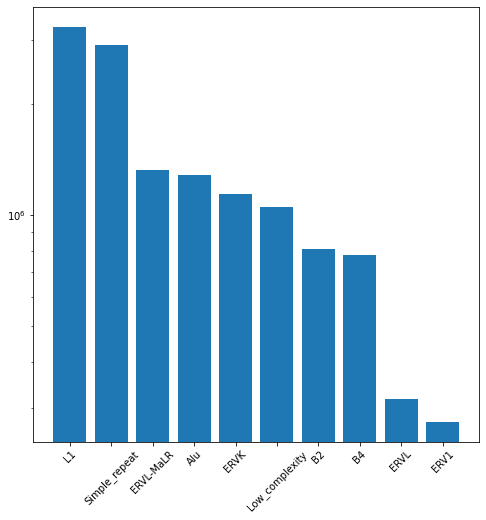

In [35]:
uni, cou = np.unique(matches.repFamily, return_counts=True)
number = 10
idx = np.argsort(cou)[::-1]
idx = idx[:number]
plt.figure(figsize=(8, 8))
plt.bar(x=uni[idx],height=cou[idx])
plt.yscale("log")
plt.xticks(rotation = 45)

In [38]:
chr, pos, score = [], [], []
with open("/home/maxime/genomewide_streme_mM_gap3_minpeak3/repeats.fasta", "r") as f:
    l = np.array(f.readlines()[::2])


l = np.array(np.char.split(l, "_"))
l = np.stack(l, axis = 0)

import pandas as pd

df = pd.DataFrame(l, columns=["chr", "pos", "score"])

df["chr"] = df["chr"].str.lstrip(">")
df["score"] = df["score"].str.rstrip("\n")
df = df.astype({'pos':'int64'})

rm = pd.read_csv("/home/maxime/data/sequences/mm10/repeat_masker", sep = "\t")

def search(x):
    mask = np.logical_and(rm.genoName == x["chr"],np.logical_and(rm.genoStart<=x['pos'], rm.genoEnd>=x['pos']))
    return rm.loc[mask].repName.tolist()[0]


rep = df[:10].apply(search, axis=1)
df.to_csv("/home/maxime/genomewide_streme_mA/repeats.csv", sep = "\t")

In [56]:
import time
t =  []
for i in [1, 5, 10, 100, 1000]:
    t0 = time.time()
    rep = df[:i].apply(search, axis=1)
    t.append(time.time()-t0)

In [57]:
def search_opt(df, rm):
    mask = np.logical_and(rm.genoName.values.reshape((-1,1)) == df["chr"].values[:, None], np.logical_and(rm.genoStart.values[:, None] <= df['pos'].values, rm.genoEnd.values[:, None] >= df['pos'].values))
    return pd.Series(np.where(mask.any(axis=0), rm.loc[mask.argmax(axis=0), 'repName'], np.nan), index=df.index)


In [71]:
def search_opt(df, rm):
    mask = np.logical_and(rm.genoName.values[:, None] == df["chr"].values, np.logical_and(rm.genoStart.values[:, None] <= df['pos'].values, rm.genoEnd.values[:, None] >= df['pos'].values))
    return pd.Series(np.where(mask.any(axis=0), rm.loc[mask.argmax(axis=0), 'repName'], np.nan), index=df.index)
r = search_opt(df[:2], rm)
import time
topt =  []
for i in [1, 5, 10, 100, 500, 1000]:
    t0 = time.time()
    r = search_opt(df[:i], rm)
    topt.append(time.time()-t0)

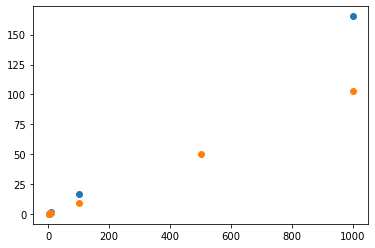

In [72]:
plt.scatter([1, 5, 10, 100, 1000], t)
plt.scatter([1, 5, 10, 100,500, 1000], topt)

In [77]:
(topt[-1]/1000)*60000/3600

1.7182027141253153

<AxesSubplot:>

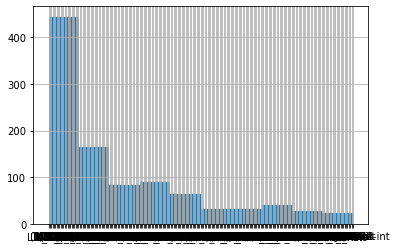

In [74]:
r.hist()

In [81]:

def search_opt(df, rm):
    mask = np.logical_and(rm.genoName.values[:, None] == df["chr"].values, np.logical_and(rm.genoStart.values[:, None] <= df['pos'].values, rm.genoEnd.values[:, None] >= df['pos'].values))
    return pd.Series(np.where(mask.any(axis=0), rm.loc[mask.argmax(axis=0), 'repName'], np.nan), index=df.index)

r = []
idx = 0
dftmp = df[:130]
for i in range(len(dftmp)//100):
    r.append(search_opt(dftmp[idx:idx+100], rm))
    idx+=100

r.append(search_opt(dftmp[idx:], rm))




In [83]:
pd.concat(r)

0      L1Md_F3
1        L1ME1
2      L1_Mur3
3        (TG)n
4        (GA)n
        ...   
125    Lx3_Mus
126        Lx8
127       MT2A
128    (GAAA)n
129    L1Md_F2
Length: 130, dtype: object

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv("/home/maxime/genomewide_streme_mA_gap3_minpeak3/repeats.csv", sep = "\t")
rm = pd.read_csv("/home/maxime/data/sequences/mm10/repeat_masker", sep = "\t")

names = ["repName", "repClass", "repFamily"]
for i in range(1, 3):
    val = pd.DataFrame(rm.groupby(names))[0].values
    dico = {}
    for v in val:
        dico[v[0]] = v[i]
    a[names[i]] = list(map(lambda x : dico[x],a.repName))

In [39]:
pd.unique(a.repFamily)

array(['L1', 'B2', 'Low_complexity', 'Satellite', 'Simple_repeat',
       'ERVL-MaLR', 'hAT-Charlie', 'ERVK', 'B4', 'ERVL', 'L2', 'Alu',
       'ERV1', 'TcMar-Tigger', 'ID', 'L1-dep?', 'hAT-Tip100', 'MIR',
       'ERVK?', 'LTR?', 'tRNA', 'Y-chromosome', 'RTE-X', 'TcMar-Tc2',
       'CR1', 'Unknown', 'Gypsy?', 'Deu', 'Merlin', 'LTR',
       'hAT-Blackjack', 'Helitron', 'snRNA', 'Gypsy', 'scRNA', 'ERVL?',
       'DNA', 'DNA?', 'TcMar-Mariner', 'tRNA-RTE', 'PiggyBac', 'hAT',
       'TcMar?', 'hAT?', 'hAT-Tip100?', 'MuDR', 'tRNA-Deu', 'TcMar',
       'SINE?', 'RTE-BovB', 'Helitron?', 'srpRNA', 'rRNA'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

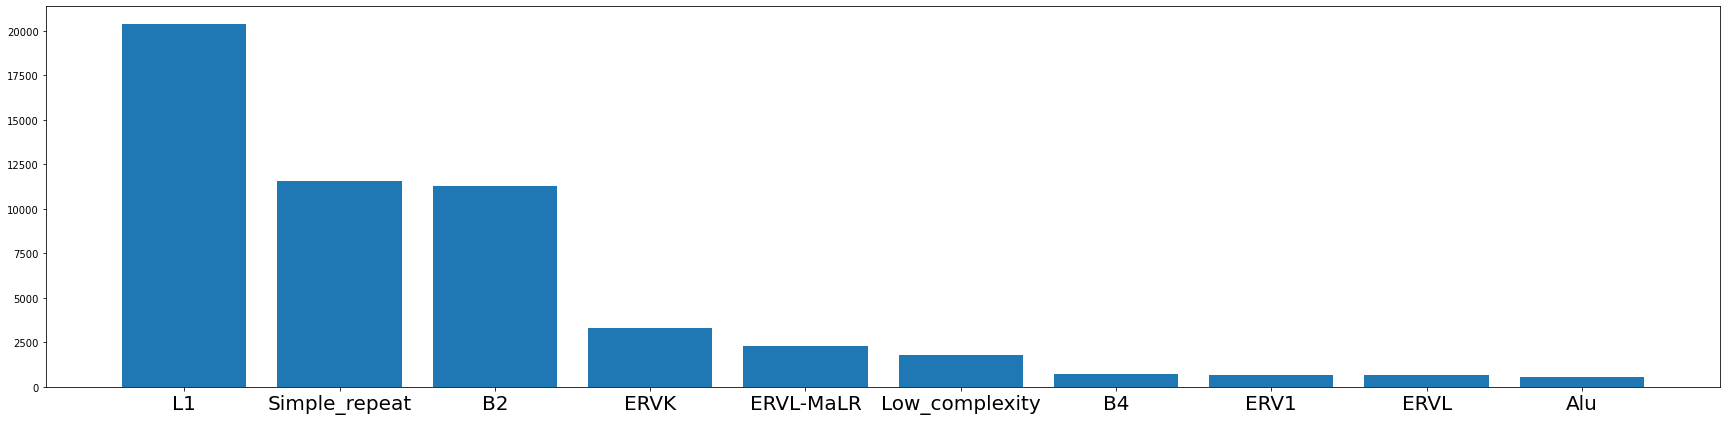

In [40]:
uni, cou = np.unique(a.repFamily, return_counts=True)
idx = np.argsort(cou)[::-1]
n = 10
plt.figure(figsize=(30, 7))
plt.bar(uni[idx][:n], cou[idx][:n])
plt.xticks(fontsize=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

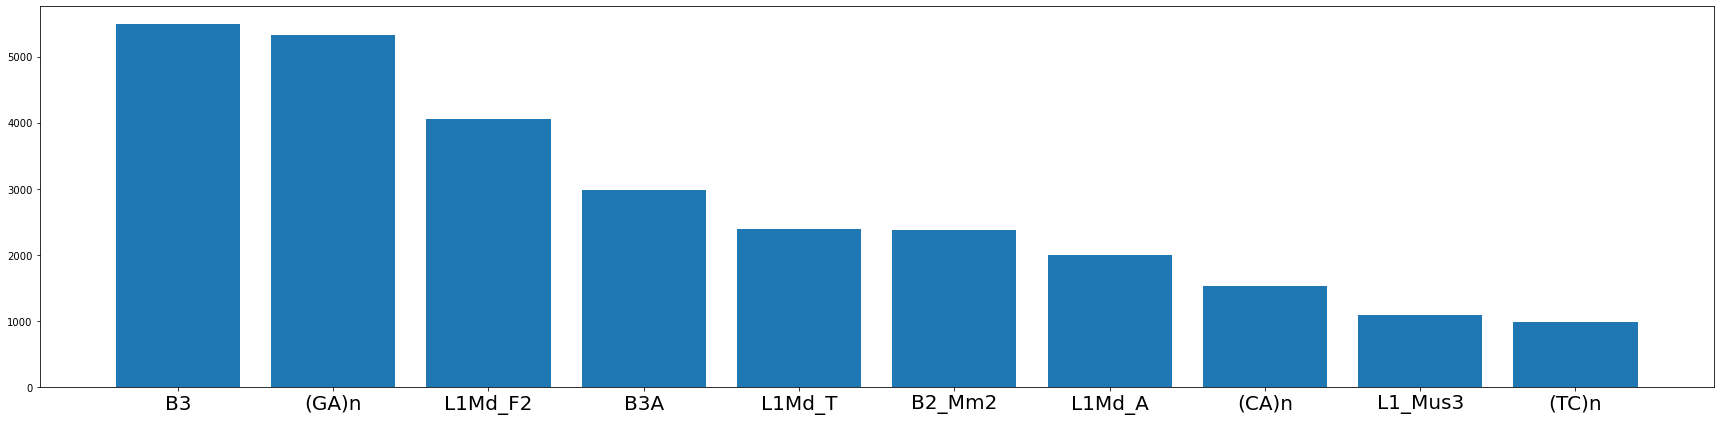

In [41]:
uni, cou = np.unique(a.repName, return_counts=True)
idx = np.argsort(cou)[::-1]
n = 10
plt.figure(figsize=(30, 7))
plt.bar(uni[idx][:n], cou[idx][:n])
plt.xticks(fontsize=20)

In [48]:
mut = np.mean(np.load("/home/maxime/data/mnase/mutasome/archives/mut_mA_chr1_3M_minus3M.npy"), axis = 1)
mut.shape

(189471971,)

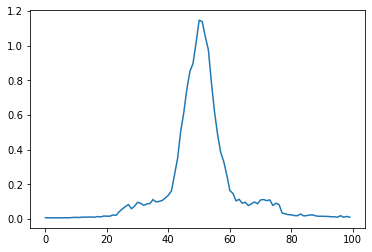

In [50]:
b2p = np.array(a[(a.chr=="chr1") & (a.repFamily=="B2")]["pos"])

tmp = []
for b in b2p:
    b -= 3_000_000
    tmp.append(mut[b-50:b+50])

plt.plot(np.mean(tmp, axis = 0))